In [1]:
import numpy as np
from scipy.io import wavfile
from scipy import signal

import librosa
import librosa.display

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap('coolwarm')

from IPython.display import Audio

<Figure size 432x288 with 0 Axes>

In [2]:
def to_decibels(x):
    return 10 * np.log10(x)


def plot_spectrogram(f, t, spectrum):
    plt.pcolormesh(t, f, to_decibels(spectrum))
    plt.show()

# Generating noise

### White noise

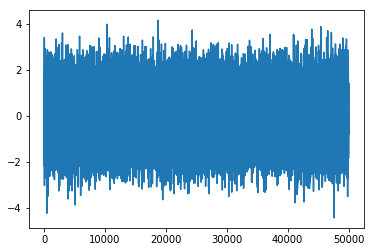

In [3]:
rate = 14440

white_noise = np.random.randn(50000)
plt.plot(range(white_noise.size), white_noise)
Audio(data=white_noise, rate=rate)

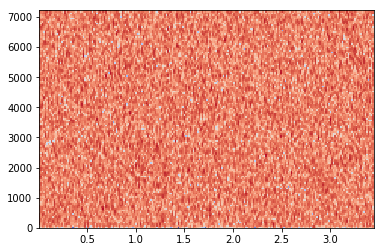

In [4]:
white_noise_spectrogram_data = signal.spectrogram(white_noise, fs=rate, window='blackman')

plot_spectrogram(*white_noise_spectrogram_data)

### Brownian noise

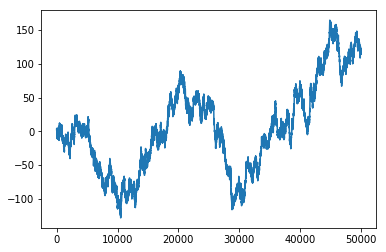

In [5]:
brown_noise = np.cumsum(np.random.randn(50000))
plt.plot(range(brown_noise.size), brown_noise)
Audio(data=brown_noise, rate=14440)

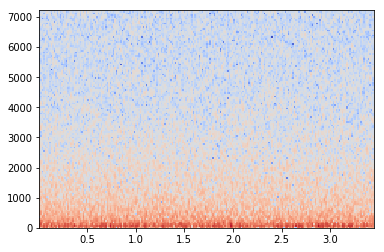

In [6]:
brown_noise_spectrogram_data = signal.spectrogram(brown_noise, fs=rate, window='blackman')

plot_spectrogram(*brown_noise_spectrogram_data)

$\hat{f}$ - random normal vector

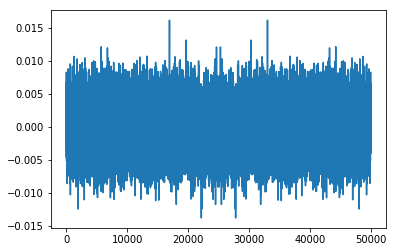

In [7]:
random_continuous = np.random.randn(50000)
x_random_frequency = np.real(np.fft.ifft(random_continuous))
plt.plot(range(x_random_frequency.size), x_random_frequency)
Audio(data=x_random_frequency, rate=14440)

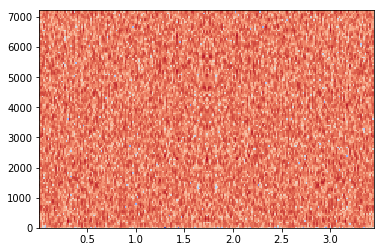

In [8]:
x_random_frequency_spectrogram_data = signal.spectrogram(x_random_frequency, fs=rate, window='blackman')

plot_spectrogram(*x_random_frequency_spectrogram_data)

# Music data

I downloaded sample sound to assets folder. You can check the original out [here on freesound](https://freesound.org/people/StanGenda/sounds/122302/)

In [2]:
import librosa

In [3]:
wave, rate = librosa.load('../assets/dub-drum.wav')

/etc/conda/envs/ml/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: '../assets/dub-drum.wav'

In [10]:
Audio(data=wave, rate=rate)

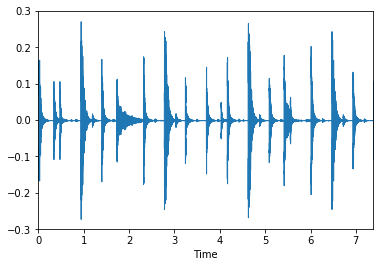

In [11]:
librosa.display.waveplot(wave, sr=rate)

In [12]:
n_fft = 2048
hop_length= n_fft // 4

wave_stft = librosa.spectrum.stft(wave, n_fft=n_fft, hop_length=hop_length, window=('tukey', 0.25))

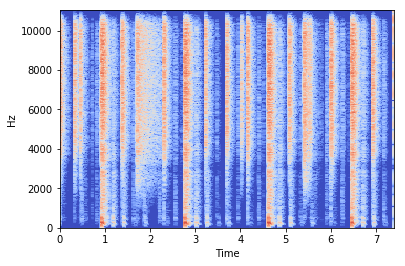

In [13]:
librosa.display.specshow(
    librosa.amplitude_to_db(abs(wave_stft)),
    sr=rate, y_axis='hz', x_axis='time', cmap='coolwarm')

For musical data (and not only that) there are some types of feature extraction that are based on the properties of human auditory system.

### Mel spectrogram

Mel spectrogram uses logarithmical frequency scale, that is, the frequency bins at which it computes the transform are powers of 10.

Precisely

$m = 2595 \log_{10}(1 + \frac{f}{700})$

Where $m$'s units are mels, and $f$ is in Hertz.

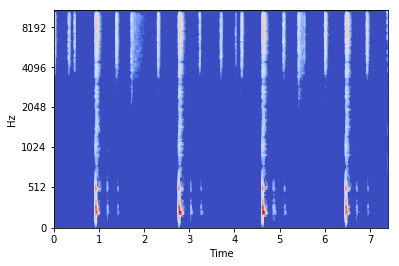

In [14]:
wave_melspectrogram =  librosa.feature.melspectrogram(wave, sr=rate, n_fft=n_fft, hop_length=hop_length)

librosa.display.specshow(
    librosa.amplitude_to_db(abs(wave_melspectrogram)),
    sr=rate, y_axis='mel', x_axis='time', cmap='coolwarm')